In [1]:
import numpy as np 
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [3]:
balanced_train = pd.read_csv("emnist-balanced-train.csv")
balanced_test = pd.read_csv("emnist-balanced-test.csv")
mapp = pd.read_csv("emnist-balanced-mapping.txt", delimiter = ' ', index_col=0, header=None, squeeze=True)

In [4]:
print("Train: %s, Test: %s, Map: %s" %(balanced_train.shape, balanced_test.shape, mapp.shape))

Train: (112799, 785), Test: (18799, 785), Map: (47,)


In [5]:
balanced_train.head()

,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
balanced_test.head()

,41,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532
0,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# label of data
balanced_train["45"]

0         36
1         43
2         15
3          4
4         42
          ..
112794    22
112795    17
112796    23
112797    31
112798     8
Name: 45, Length: 112799, dtype: int64

In [8]:
# label of data
balanced_test["41"]

0        39
1         9
2        26
3        44
4        33
         ..
18794    45
18795    15
18796     1
18797    26
18798    33
Name: 41, Length: 18799, dtype: int64

In [9]:
classes = len(balanced_train['45'].value_counts())
print('number of classes: ', classes)

number of classes:  47


In [10]:
train_x = balanced_train.iloc[:,1:]
train_y = balanced_train.iloc[:,0]

test_x = balanced_test.iloc[:,1:]
test_y = balanced_test.iloc[:,0]

In [11]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(112799, 784) (112799,) (18799, 784) (18799,)


In [12]:
# Normalise data
x_train = np.array(train_x) / 255.0
y_train = np.array(train_y)
x_test = np.array(test_x) / 255.0
y_test = np.array(test_y)

In [13]:
x_train.astype('float32')
x_test.astype('float32')

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
#Reshaping all images into 28*28 for pre-processing
x_train = x_train.reshape(x_train.shape[0], 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)
print(x_train.shape,x_test.shape)

(112799, 28, 28) (18799, 28, 28)


In [15]:
def image(data):
        image = np.fliplr(data)
        image = np.rot90(image)
        return image

def create_images(data, start, end):
    images = []
    for i in range(start,end):
        images.append(image(data[i]))
    return images

In [16]:
y = create_images(x_train, 100,115)

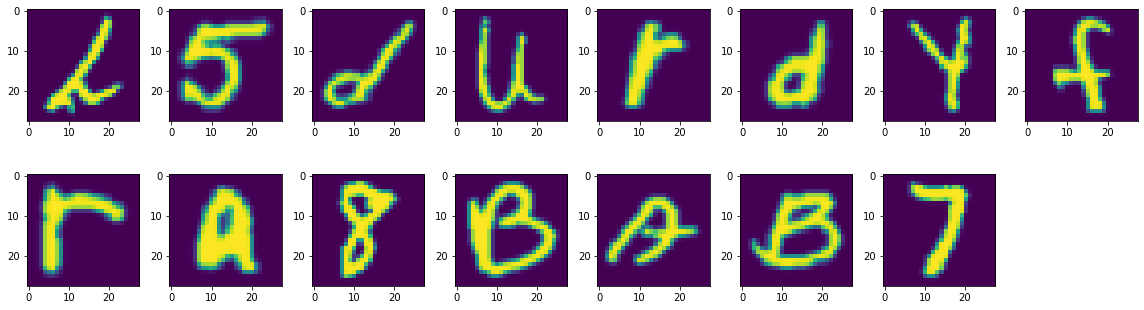

In [17]:
rows = len(y)//2
cols = (len(y)//2)+1
axes=[]
fig=plt.figure(figsize=(16, 16))
for a in range(rows+cols):
    axes.append( fig.add_subplot(rows, cols, a+1))
    plt.imshow(y[a])
fig.tight_layout()    
plt.show()

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import callbacks

In [19]:
# One hot encoding
train_y = to_categorical(train_y, classes)
test_y = to_categorical(test_y, classes)
print("train_y: ", train_y.shape)
print("test_y: ", test_y.shape)

train_y:  (112799, 47)
test_y:  (18799, 47)


In [20]:
# Reshape image for CNN
train_x = x_train.reshape(-1, 28, 28, 1)
test_x = x_test.reshape(-1, 28, 28, 1)
print("train_x_oo: ", train_x.shape)

train_x_oo:  (112799, 28, 28, 1)


In [21]:
# Partition to train and val
train_xx, label_x, train_yy, label_y = train_test_split(train_x, train_y,  test_size=0.2, random_state = 42)

In [22]:
model = Sequential()

model.add(layers.Conv2D(filters = 32,
                        kernel_size = (3,3),
                        padding = 'same',
                        activation = 'relu',
                        input_shape = (28, 28,1)))
model.add(layers.MaxPooling2D(pool_size = (2,2)))

model.add(layers.Conv2D(filters = 64,
                        kernel_size = (3,3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters = 64,
                        kernel_size = (3,3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(units = 64,
                       activation = 'relu'))
model.add(layers.Dropout(.5))
model.add(layers.Dense(units = classes,
                       activation = 'softmax'))

2022-04-26 03:00:32.497302: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [24]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [25]:
# Set callback functions to stop training early and save the best model so far
keras_callbacks   = [
    callbacks.EarlyStopping(monitor = 'val_loss', patience =50,
                            mode = 'auto', verbose = 1),
    callbacks.ModelCheckpoint(filepath = 'best_model_cnn_emnist.h5', monitor = 'val_loss',
                              save_best_only = True, mode = 'auto', verbose = 1)
]

In [26]:
model_history = model.fit(train_xx, train_yy,
                    epochs = 100,
                    batch_size = 256,
                    verbose = 1,
                    validation_data=(label_x, label_y),
                         callbacks=keras_callbacks)

2022-04-26 03:00:33.483289: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
353/353 [==============================] - 41s 113ms/step - loss: 1.9672 - accuracy: 0.4381 - val_loss: 0.6470 - val_accuracy: 0.7891

Epoch 00001: val_loss improved from inf to 0.64704, saving model to /kaggle/working/best_model_cnn_emnist.h5
Epoch 2/100
353/353 [==============================] - 39s 111ms/step - loss: 1.0137 - accuracy: 0.6772 - val_loss: 0.5092 - val_accuracy: 0.8228

Epoch 00002: val_loss improved from 0.64704 to 0.50924, saving model to /kaggle/working/best_model_cnn_emnist.h5
Epoch 3/100
353/353 [==============================] - 39s 111ms/step - loss: 0.8404 - accuracy: 0.7276 - val_loss: 0.4664 - val_accuracy: 0.8358

Epoch 00003: val_loss improved from 0.50924 to 0.46640, saving model to /kaggle/working/best_model_cnn_emnist.h5
Epoch 4/100
353/353 [==============================] - 40s 112ms/step - loss: 0.7588 - accuracy: 0.7526 - val_loss: 0.4240 - val_accuracy: 0.8468

Epoch 00004: val_loss improved from 0.46640 to 0.42396, saving model to /kagg

In [27]:
# Variables - Function definition for plot accuracy
accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = list(range(1,len(val_accuracy)+1))

In [28]:
import json
data = {"accuracy":accuracy, "val_accuracy":val_accuracy, "loss":loss, "val_loss": val_loss, "epochs":epochs}
json_data = json.dumps(data)
with open("data.json", "w") as outfile:
    outfile.write(json_data)

In [29]:
f = open("data.json", mode="r")
data = json.load(f)
accuracy = data["accuracy"]
val_accuracy = data["val_accuracy"]
loss = data["loss"]
val_loss = data["val_loss"]
epochs = data["epochs"]

In [30]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=epochs,
    y=val_accuracy,
    name="Training"       # this sets its legend entry
))


fig.add_trace(go.Scatter(
    x=epochs,
    y=accuracy,
    name="Validation"
))

fig.update_layout(
    title="Model Accuracy",
    xaxis_title="Epoch",
    yaxis_title="Accuracy",
    legend_title="Accuracy vs Epochs",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.show()

In [31]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=epochs,
    y=loss,
    name="Training"       # this sets its legend entry
))


fig.add_trace(go.Scatter(
    x=epochs,
    y=val_loss,
    name="Validation"
))

fig.update_layout(
    title="Model Loss",
    xaxis_title="Epoch",
    yaxis_title="Loss",
    legend_title="Loss vs Epochs",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.show()

In [32]:
# Evaluate model
scores = model.evaluate(test_x, test_y, verbose=0)
print(f'Score: {model.metrics_names[0]} of {round(scores[0], 4)}; '
      f'{model.metrics_names[1]} of {round((scores[1]*100), 4)}%')

Score: loss of 0.4361; accuracy of 87.7387%


In [33]:
y_pred = model.predict(test_x)

In [34]:
# Confusion matrix (scikit-learn)
cm = metrics.confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))
cm

array([[245,   0,   0, ...,   0,   0,   0],
       [  0, 273,   0, ...,   0,   1,   0],
       [  0,   0, 340, ...,   1,   0,   0],
       ...,
       [  0,   0,   0, ..., 245,   0,   0],
       [  0,   0,   0, ...,   0, 381,   1],
       [  0,   0,   0, ...,   0,   4, 363]])

In [35]:
from tensorflow.keras.models import load_model
saved_model = load_model("best_model_cnn_emnist.h5")

In [36]:
# Evaluate the saved model
scores = saved_model.evaluate(test_x, test_y, verbose = 1)
print(f'Score: {saved_model.metrics_names[0]} of {round(scores[0], 4)}; '
      f'{saved_model.metrics_names[1]} of {round((scores[1]*100), 4)}%')

588/588 [==============================] - 4s 6ms/step - loss: 0.3666 - accuracy: 0.8795
Score: loss of 0.3666; accuracy of 87.9462%
